In [2]:
import numpy as np
import scipy
import pylab as mplot
from scipy import interpolate as intrp
from scipy import integrate as intg
import scipy.optimize as op

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_file0 = np.load('Planck_cluster_bootstrap_0.npz')
print(data_file0['mass'])
print(data_file0['z'])

8.735104
0.0557


In [4]:
h0 = 0.7
Om0 = 0.3
z_max = 40./h0
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=100*h0, Om0=Om0)
from astropy import units as u

# first cluster has SZ mass M, assume SZ mass scales with M500, assume know R500 for first cluster is 18 arcmin
def M500m_to_R500m(mass, z, cosmo):
    rho_m_z = cosmo.Om(z)*cosmo.critical_density(z)
    mass_units = mass*u.Msun
    R500m = ((mass_units/(500.*4.*np.pi*rho_m_z/3.))**(1./3.)).to('Mpc')
    return R500m.value

def M500c_to_R500c(mass, z, cosmo):
    rho_c_z = cosmo.critical_density(z)
    mass_units = mass*u.Msun
    R500c = ((mass_units/(500.*4.*np.pi*rho_c_z/3.))**(1./3.)).to('Mpc')
    return R500c.value

R500_MSZ = M500c_to_R500c(data_file0['mass']*10**14, data_file0['z'], cosmo)
print(R500_MSZ*(1+data_file0['z'])/(18./60/180*np.pi))
print(cosmo.comoving_distance(data_file0['z']).value)
Factor = R500_MSZ*(1+data_file0['z'])/(18./60/180*np.pi)/cosmo.comoving_distance(data_file0['z']).value

print(M500c_to_R500c(data_file0['mass']*10**14/Factor**3, data_file0['z'], cosmo)*(1+data_file0['z'])/(18./60/180*np.pi))

print(Factor)

287.93891167665856
235.52581162872076
235.52581162872076
1.2225365435978668


In [5]:
data_file0 = np.load('Planck_cluster_bootstrap_0.npz')

18.0
15.445632383613233
15.591402808257627
17.03140539926733
39.079603849044894
19.007377405827864
11.680888848985843
16.775852357993102
10.86186552904598
12.482350599929763


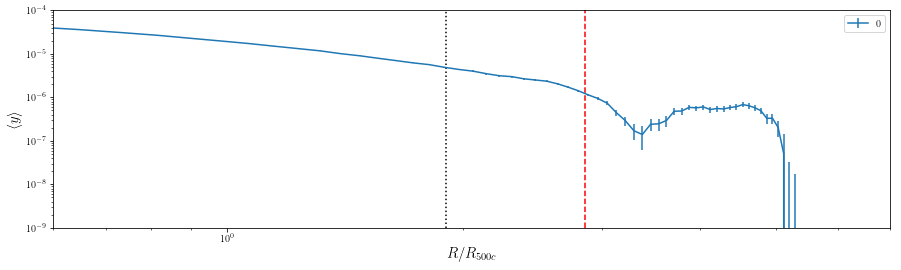

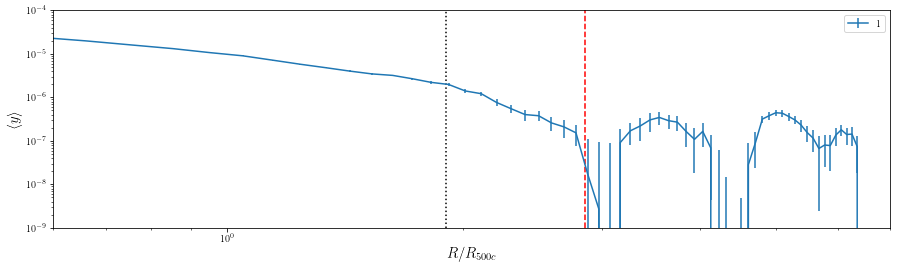

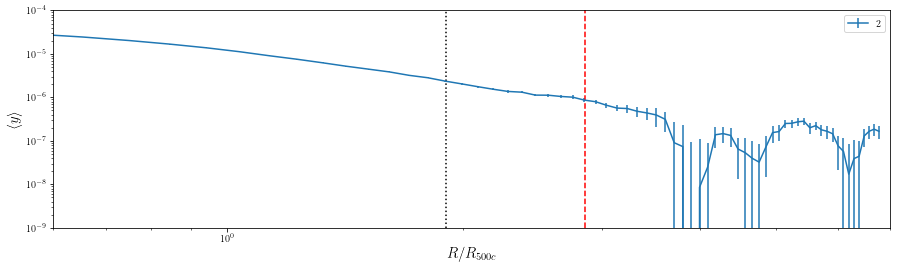

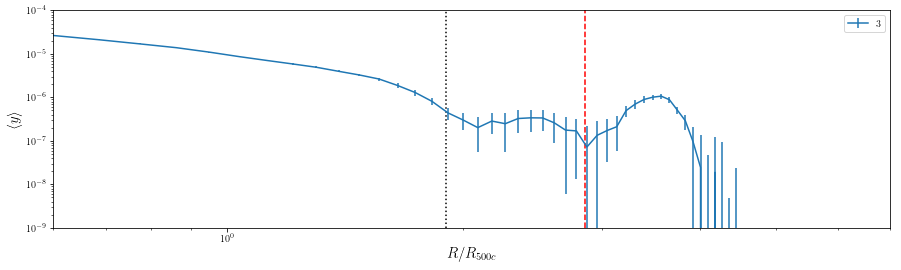

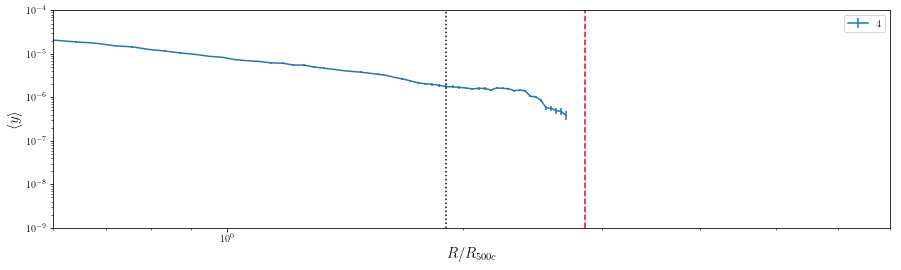

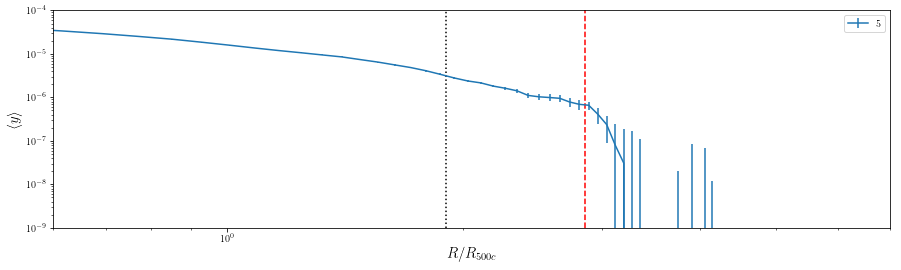

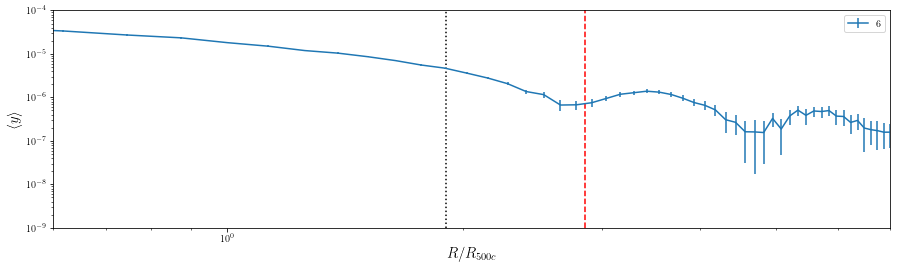

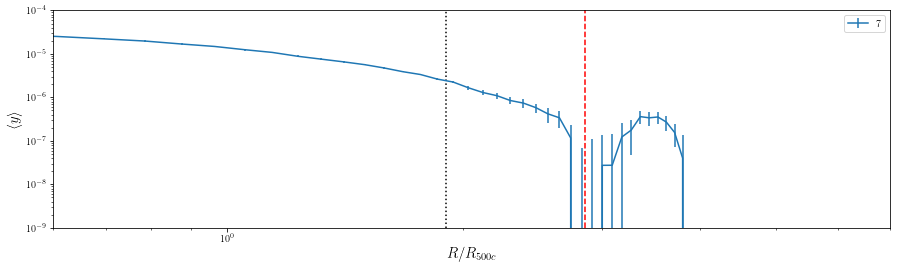

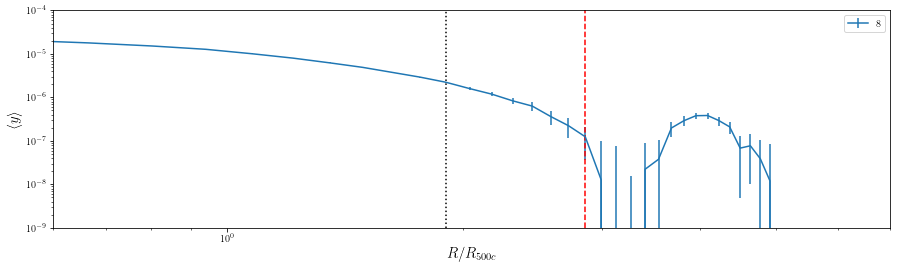

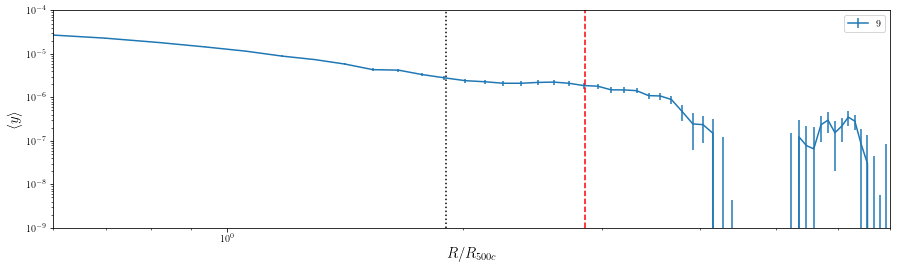

In [9]:
N = 70
for i in range(10):
    data_file = np.load('Planck_cluster_bootstrap_'+str(i)+'.npz')
    data_vec = data_file['mean_y'][:N] - data_file['bg']
    invcov = np.linalg.inv(data_file['cov'][:N, :N])

    # first cluster has R500=18'
    M1 = data_file['mass']*10**14/Factor**3
    R500c = (1+data_file['z'])*M500c_to_R500c(data_file['mass']*10**14/Factor**3, data_file0['z'], cosmo)/cosmo.comoving_distance(data_file['z']).value /np.pi*180.*60
    print(R500c)
    R = data_file['theta'][:N] / R500c
    mplot.figure(figsize=(15,4))
    mplot.plot([2.86,2.86],[1e-9, 1e-4], color='r', ls='--')
    mplot.plot([1.9,1.9],[1e-9, 1e-4], color='k', ls=':')

    mplot.errorbar(R, data_vec, yerr=np.diag(data_file['cov'][:N, :N])**0.5, label=str(i))
    mplot.legend()
    mplot.xscale('log')
    mplot.yscale('log')
    mplot.xlabel('$R/R_{500c}$', fontsize=15)
    mplot.ylabel('$\\langle y  \\rangle$', fontsize=15)
    mplot.xlim(0.6,7)
    mplot.ylim(1e-9, 1e-4)

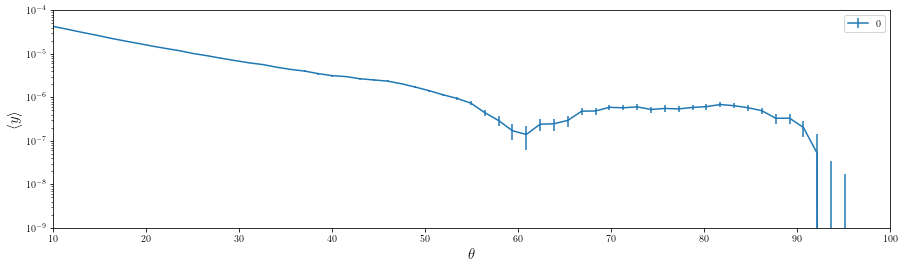

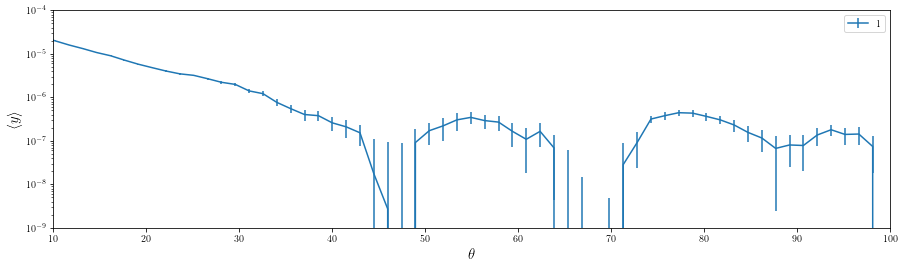

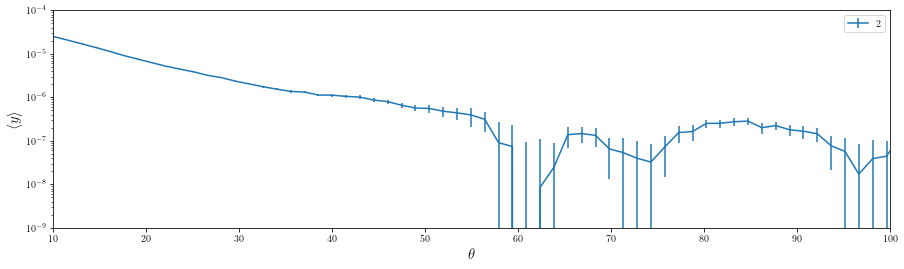

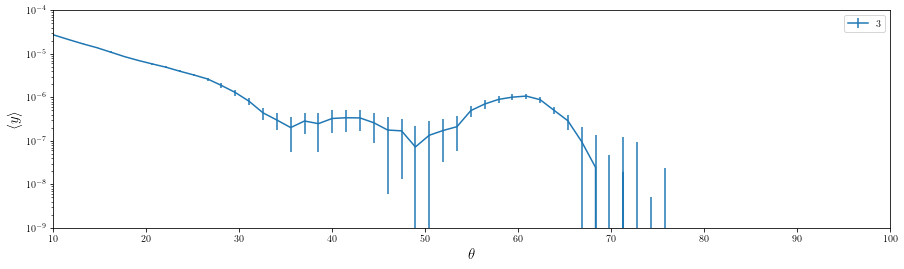

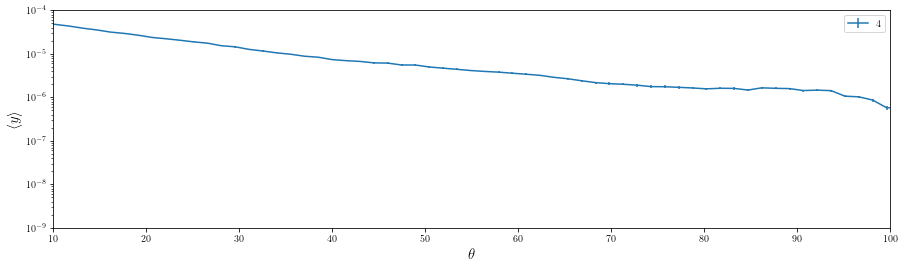

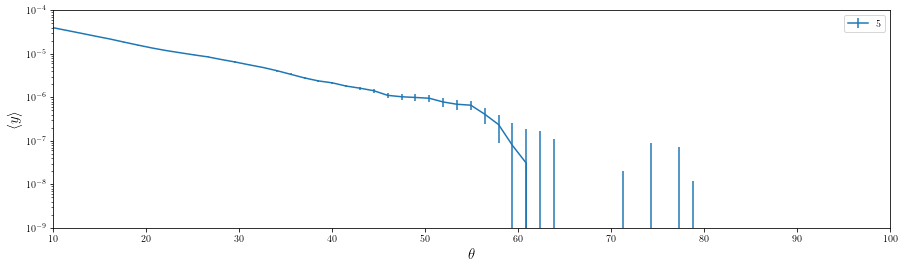

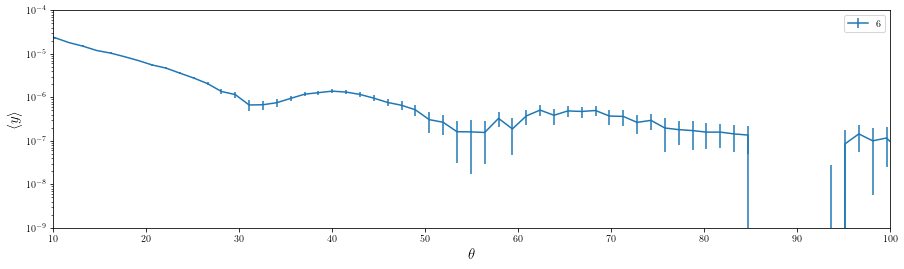

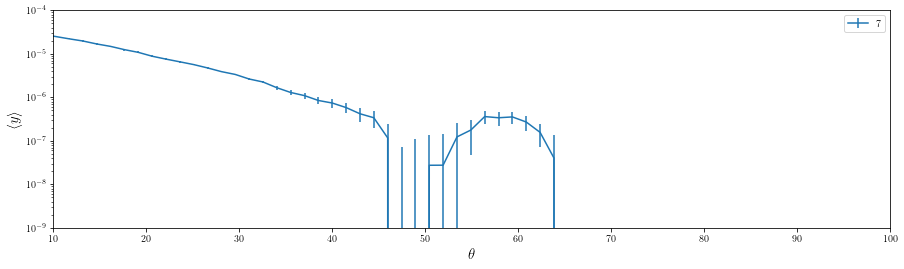

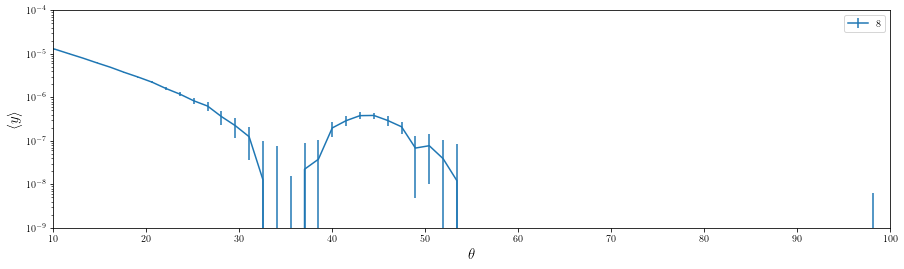

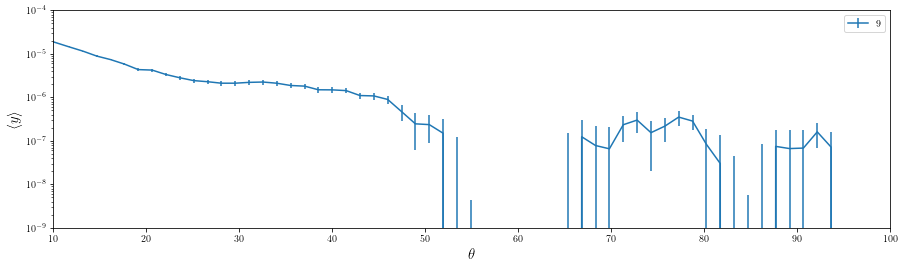

In [7]:
N = 70
for i in range(10):
    data_file = np.load('Planck_cluster_bootstrap_'+str(i)+'.npz')
    data_vec = data_file['mean_y'][:N] - data_file['bg']
    invcov = np.linalg.inv(data_file['cov'][:N, :N])

    # first cluster has R500=18'
    M1 = data_file['mass']*10**14/Factor**3
#     R500 = (1+data_file['z'])*M500_to_R500m(data_file['mass']*10**14/Factor**3, data_file0['z'], cosmo)/cosmo.comoving_distance(data_file['z']).value /np.pi*180.*60
#     print(R500)
#     R = data_file['theta'][:N] / R500
    mplot.figure(figsize=(15,4))

    mplot.errorbar(data_file['theta'][:N], data_vec, yerr=np.diag(data_file['cov'][:N, :N])**0.5, label=str(i))
    mplot.legend()
#     mplot.xscale('log')
    mplot.yscale('log')
    mplot.xlabel('$\\theta$', fontsize=15)
    mplot.ylabel('$\\langle y  \\rangle$', fontsize=15)
    mplot.xlim(10,100)
    mplot.ylim(1e-9, 1e-4)

### Now we use the scaled measurements

8.735104
6.2107387
6.636994
6.853962
7.1652966
7.9394145
8.771307
7.0358543
5.3828144
7.039484


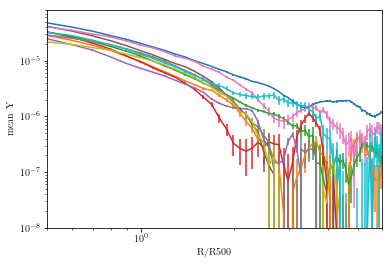

In [47]:
Mean_Y = []
Var_Y = []

for i in range(10):
    data_file = np.load('Planck_cluster_bootstrap_scaled_'+str(i)+'.npz')
    print(data_file['mass'])
    Mean_Y.append(data_file['mean_y'])
    Var_Y.append(np.diag(data_file['cov']))
    R_over_R500 = data_file['R_over_R500']
    
    mplot.errorbar(R_over_R500, data_file['mean_y'], yerr=np.diag(data_file['cov'])**0.5)

mplot.xscale('log')
mplot.yscale('log')
mplot.xlim(0.5,6)
mplot.ylim(1e-8,8e-5)
mplot.xlabel('R/R500')
mplot.ylabel('mean Y')

Mean_Y = np.array(Mean_Y)
Var_Y = np.array(Var_Y)

w = 1./Var_Y
stack_Y_mean = np.sum(Mean_Y*w, axis=0)/np.sum(w, axis=0)
stack_Y_err = (1./np.sum(w, axis=0))**0.5

In [48]:
print(data_file.files)

['ra', 'dec', 'lon', 'lat', 'z', 'mass', 'snr', 'R_over_R500', 'mean_y', 'bg', 'cov']


Text(0, 0.5, 'mean Y')

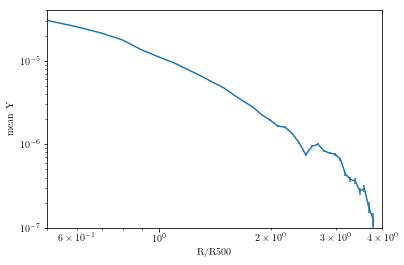

In [49]:
mplot.errorbar(R_over_R500,stack_Y_mean, yerr=stack_Y_err)
mplot.xscale('log')
mplot.yscale('log')
mplot.xlim(0.5,4)
mplot.ylim(1e-7,4e-5)
mplot.xlabel('R/R500')
mplot.ylabel('mean Y')

/Users/chihwaychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(-10, 5)

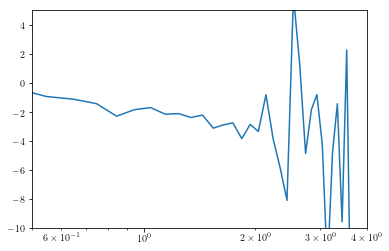

In [50]:
lnr = np.log(R_over_R500)
lny = np.log(stack_Y_mean)
mplot.semilogx((R_over_R500[1:]+R_over_R500[:-1])/2, (lny[1:]-lny[:-1])/(lnr[1:]-lnr[:-1]))
mplot.xlim(0.5,4)
mplot.ylim(-10,5)
